In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import rcParams

In [2]:
# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 7,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True, 
    'legend.title_fontsize': 4}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 379.417 # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [fig_width,2*0.75*fig_height]
rcParams.update({'figure.figsize': fig_size})

In [3]:
ppv = lambda f, TPR, TNR: f * TPR/ ( f * TPR + (1 - f ) * (1 - TNR) )

In [4]:
npv = lambda f, TPR, TNR: (1 - f ) * TNR / ( (1 - f ) * TNR + f * (1 - TPR) )

In [5]:
tpr_and = lambda TPR1, TPR2: TPR1 * TPR2

In [6]:
tnr_and = lambda TNR1, TNR2: TNR1 + TNR2 - TNR1 * TNR2

In [7]:
tpr_or = lambda TPR1, TPR2: TPR1 + TPR2 - TPR1 * TPR2

In [8]:
tnr_or = lambda TNR1, TNR2: TNR1 * TNR2

/home/lucasb/anaconda3/envs/epidemics/lib/python3.6/site-packages/ipykernel_launcher.py:79: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


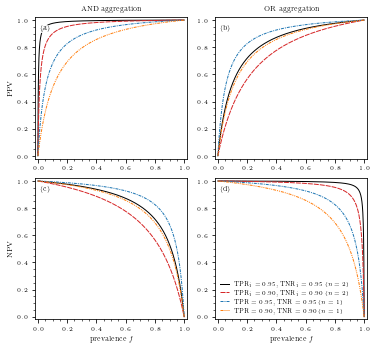

In [10]:
mosaic = """
    AB
    CD
    """

f = np.linspace(0,1,1000)

fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic(mosaic)
fig.patch.set_facecolor('white')

ax["A"].set_title(r"$\mathrm{AND}$ aggregation")
ax["B"].set_title(r"$\mathrm{OR}$ aggregation")

text = ax["A"].text(0.03*1.04-0.02,0.91*1.04-0.02,r"(a)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

text = ax["B"].text(0.03*1.04-0.02,0.91*1.04-0.02,r"(b)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

text = ax["C"].text(0.03*1.04-0.02,0.91*1.04-0.02,r"(c)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

text = ax["D"].text(0.03*1.04-0.02,0.91*1.04-0.02,r"(d)")
text.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white', pad=0))

ax["A"].plot(f, ppv(f,tpr_and(0.95,0.95),tnr_and(0.95,0.95)),color='k',linewidth=1.0,label='$\mathrm{TPR}_i=0.95$, $\mathrm{TNR}_i=0.95$ ($n=2$)')
ax["A"].plot(f, ppv(f,tpr_and(0.9,0.9),tnr_and(0.9,0.9)),color='tab:red',linewidth=1.0,ls=(0, (5, 1)),label='$\mathrm{TPR}_i=0.90$, $\mathrm{TNR}_i=0.90$ ($n=2$)')

ax["A"].plot(f, ppv(f,0.95,0.95),color='tab:blue',linewidth=1.0,ls=(0, (3, 1, 1, 1)),label='$\mathrm{TPR}=0.95$, $\mathrm{TNR}=0.95$ ($n=1$)')
ax["A"].plot(f, ppv(f,0.9,0.9),color='tab:orange',linewidth=1.0,ls=(0, (3, 1, 1, 1, 1, 1)),label='$\mathrm{TPR}=0.90$, $\mathrm{TNR}=0.90$ ($n=1$)')

ax["B"].plot(f, ppv(f,tpr_or(0.95,0.95),tnr_or(0.95,0.95)),color='k',linewidth=1.0,label='$\mathrm{TPR}_i=0.95$, $\mathrm{TNR}_i=0.95$ ($n=2$)')
ax["B"].plot(f, ppv(f,tpr_or(0.9,0.9),tnr_or(0.9,0.9)),color='tab:red',linewidth=1.0,ls=(0, (5, 1)),label='$\mathrm{TPR}_i=0.90$, $\mathrm{TNR}_i=0.90$ ($n=2$)')

ax["B"].plot(f, ppv(f,0.95,0.95),color='tab:blue',linewidth=1.0,ls=(0, (3, 1, 1, 1)),label='$\mathrm{TPR}=0.95$, $\mathrm{TNR}=0.95$ ($n=1$)')
ax["B"].plot(f, ppv(f,0.9,0.9),color='tab:orange',linewidth=1.0,ls=(0, (3, 1, 1, 1, 1, 1)),label='$\mathrm{TPR}=0.90$, $\mathrm{TNR}=0.90$ ($n=1$)')

ax["C"].plot(f, npv(f,tpr_and(0.95,0.95),tnr_and(0.95,0.95)),color='k',linewidth=1.0,label='$\mathrm{TPR}_i=0.95$, $\mathrm{TNR}_i=0.95$ ($n=2$)')
ax["C"].plot(f, npv(f,tpr_and(0.9,0.9),tnr_and(0.9,0.9)),color='tab:red',linewidth=1.0,ls=(0, (5, 1)),label='$\mathrm{TPR}_i=0.90$, $\mathrm{TNR}_i=0.90$ ($n=2$)')

ax["C"].plot(f, npv(f,0.95,0.95),color='tab:blue',linewidth=1.0,ls=(0, (3, 1, 1, 1)),label='$\mathrm{TPR}=0.95$, $\mathrm{TNR}=0.95$ ($n=1$)')
ax["C"].plot(f, npv(f,0.9,0.9),color='tab:orange',linewidth=1.0,ls=(0, (3, 1, 1, 1, 1, 1)),label='$\mathrm{TPR}=0.90$, $\mathrm{TNR}=0.90$ ($n=1$)')

ax["D"].plot(f, npv(f,tpr_or(0.95,0.95),tnr_or(0.95,0.95)),color='k',linewidth=1.0,label='$\mathrm{TPR}_i=0.95$, $\mathrm{TNR}_i=0.95$ ($n=2$)')
ax["D"].plot(f, npv(f,tpr_or(0.9,0.9),tnr_or(0.9,0.9)),color='tab:red',linewidth=1.0,ls=(0, (5, 1)),label='$\mathrm{TPR}_i=0.90$, $\mathrm{TNR}_i=0.90$ ($n=2$)')

ax["D"].plot(f, npv(f,0.95,0.95),color='tab:blue',linewidth=1.0,ls=(0, (3, 1, 1, 1)),label='$\mathrm{TPR}=0.95$, $\mathrm{TNR}=0.95$ ($n=1$)')
ax["D"].plot(f, npv(f,0.9,0.9),color='tab:orange',linewidth=1.0,ls=(0, (3, 1, 1, 1, 1, 1)),label='$\mathrm{TPR}=0.90$, $\mathrm{TNR}=0.90$ ($n=1$)')

ax["C"].set_xlabel("prevalence $f$")
ax["D"].set_xlabel("prevalence $f$")

ax["A"].set_ylabel("PPV")
ax["C"].set_ylabel("NPV")

ax["A"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["B"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["C"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["D"].xaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax["A"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["B"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["C"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax["D"].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

ax["A"].set_xlim(-0.02,1.02)
ax["B"].set_xlim(-0.02,1.02)
ax["C"].set_xlim(-0.02,1.02)
ax["D"].set_xlim(-0.02,1.02)

ax["A"].set_ylim(-0.02,1.02)
ax["B"].set_ylim(-0.02,1.02)
ax["C"].set_ylim(-0.02,1.02)
ax["D"].set_ylim(-0.02,1.02)

ax["D"].legend(loc=3,frameon=False,handlelength=1.5,fontsize=6)

plt.tight_layout()
plt.savefig('ppv_npv.svg',dpi=480)
plt.show()